In [16]:
# /Users/canderson/miniconda3/envs/cu-cpbs-7602/bin/python /Users/canderson/Documents/school/CPBS7602-class/assignment-01/version001/src/003-reduced-dims.py
import pandas as pd
import numpy as np  
import os 
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [17]:
os.chdir("/Users/canderson/Documents/school/CPBS7602-class/assignment-01/version001")

In [18]:
with open("processed-data/002-dat-dict.pkl",'rb') as f:
    dat_dict = pickle.load(f)

### Remove sparse genes

In [19]:
na_sum = dat_dict['logcounts'].isna().sum(axis=1).values
na_prop = na_sum / (dat_dict['logcounts'].shape[1])
print(na_prop)
# ^^ not necessary

[0. 0. 0. ... 0. 0. 0.]


### Calculate reduced dimensions

In [20]:
# fit PCA to capture 95% of variance (change n_components as needed)
print("Running PCA…")
pca = PCA(n_components=50, svd_solver='auto', random_state=0)
scores = pca.fit_transform(np.transpose(dat_dict['logcounts']))
scores = np.transpose(scores)
print("PCA finished")

Running PCA…
PCA finished


In [21]:
scores.shape
pca.explained_variance_ratio_.sum()

np.float64(0.771134911004435)

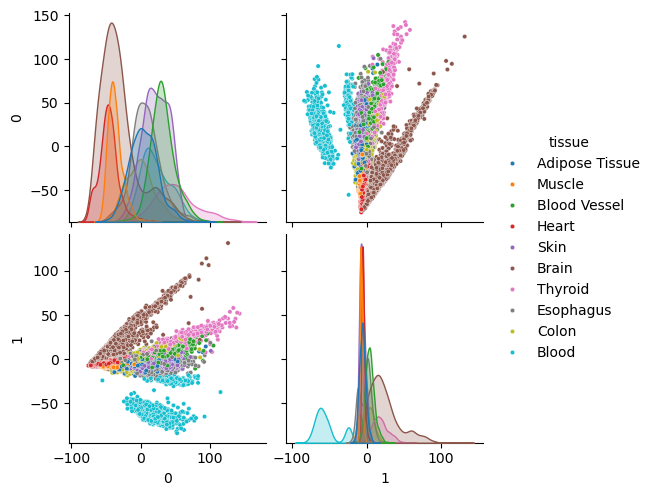

In [26]:
df = pd.DataFrame(np.transpose(scores)).iloc[:, :2].copy()
df["tissue"] = dat_dict["colData"]["SMTS"].values
sns.pairplot(df,
             hue="tissue",
             plot_kws={'s': 10})
plt.show()
plt.close()

In [24]:
# add to dat_dict
dat_dict['rDims']= {"PCA": {"scores": scores, "attributes": pca}}

### Save

In [25]:
print("Saving...")
with(open("processed-data/003-dat-dict.pkl", 'wb') as f ):
    pickle.dump(dat_dict, f)
print("Done")

Saving...
Done
